<a href="https://colab.research.google.com/github/Guilli12pm/ML_proj/blob/master/%40Notebook/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning project: kNN

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import pathlib
import random
from statistics import mode, StatisticsError
import timeit

import pandas as pd

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

##Download the images

In [70]:
#https://github.com/Guilli12pm/ML_proj/raw/master/next_ite.tar.gz

data_root_orig = tf.keras.utils.get_file('new_pic',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic.tar.gz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/new_pic/Guillaume_Paya
/root/.keras/datasets/new_pic/.DS_Store
/root/.keras/datasets/new_pic/Guillaume_Loranchet


In [71]:
data_root_orig_1 = tf.keras.utils.get_file('new_pic(1)',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic(1).tar.gz',
                                         untar=True)
data_root_1 = pathlib.Path(data_root_orig_1)
for item in data_root_1.iterdir():
  print(item)

/root/.keras/datasets/new_pic(1)/.DS_Store
/root/.keras/datasets/new_pic(1)/Konstantinos_A
/root/.keras/datasets/new_pic(1)/Miha_Sma


In [72]:
data_root_orig_2 = tf.keras.utils.get_file('new_pic(2)',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic(2).tar.gz',
                                         untar=True)
data_root_2 = pathlib.Path(data_root_orig_2)
for item in data_root_2.iterdir():
  print(item)

/root/.keras/datasets/new_pic(2)/Nicholas_S
/root/.keras/datasets/new_pic(2)/.DS_Store


In [73]:
data_root_orig_test = tf.keras.utils.get_file('next_ite',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/result.tar.gz',
                                         untar=True)
data_root_test = pathlib.Path(data_root_orig_test)
for item in data_root_test.iterdir():
  print(item)

/root/.keras/datasets/next_ite/Nicholas_S
/root/.keras/datasets/next_ite/Abdel_R
/root/.keras/datasets/next_ite/Guillaume_Paya
/root/.keras/datasets/next_ite/.DS_Store
/root/.keras/datasets/next_ite/Konstantinos_A
/root/.keras/datasets/next_ite/Guillaume_Loranchet
/root/.keras/datasets/next_ite/Miha_Sma


In [74]:
data_root_orig_testing_test = tf.keras.utils.get_file('normal_pic',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/normal_pic.tar.gz',
                                         untar=True)
data_root_testing_test = pathlib.Path(data_root_orig_testing_test)
for item in data_root_testing_test.iterdir():
  print(item)

/root/.keras/datasets/normal_pic/Nicholas_S
/root/.keras/datasets/normal_pic/Guillaume_Paya
/root/.keras/datasets/normal_pic/.DS_Store
/root/.keras/datasets/normal_pic/Konstantinos_A
/root/.keras/datasets/normal_pic/Guillaume_Loranchet
/root/.keras/datasets/normal_pic/Miha_Sma


##Inspect the dataset

In [0]:
all_image_paths_0 = list(data_root.glob('*/*'))
all_image_paths_1 = list(data_root_1.glob('*/*'))
all_image_paths_2 = list(data_root_2.glob('*/*'))

all_image_paths_train = all_image_paths_2 + all_image_paths_1 + all_image_paths_0

all_image_paths_train = [str(path) for path in all_image_paths_train]
random.shuffle(all_image_paths_train)

all_image_paths_test = list(data_root_test.glob('*/*'))

all_image_paths_test = [str(path) for path in all_image_paths_test]
random.shuffle(all_image_paths_test)

all_image_paths_testing_test = list(data_root_testing_test.glob('*/*'))

all_image_paths_testing_test = [str(path) for path in all_image_paths_testing_test]
random.shuffle(all_image_paths_testing_test)

image_count_train = len(all_image_paths_train)

In [76]:
all_image_paths_train[:5]

['/root/.keras/datasets/new_pic(1)/Miha_Sma/Miha_Sma_28_sp_9_rot_clock_1.png',
 '/root/.keras/datasets/new_pic(1)/Miha_Sma/Miha_Sma_16_sp_7_rot_anty_1.png',
 '/root/.keras/datasets/new_pic(1)/Konstantinos_A/Konstantinos_A_11_sharpened_2_6_rot_anty_1.png',
 '/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_48_sharpened_1_2.png',
 '/root/.keras/datasets/new_pic(1)/Konstantinos_A/Konstantinos_A_15_rot_anty_0.png']

In [77]:
all_image_paths_test[:5]

['/root/.keras/datasets/next_ite/Konstantinos_A/Konstantinos_A_49.png',
 '/root/.keras/datasets/next_ite/Konstantinos_A/Konstantinos_A_77.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_S_109.png',
 '/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_126.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_167.png']

In [78]:
all_image_paths_testing_test[:5]

['/root/.keras/datasets/normal_pic/Konstantinos_A/Konstantinos_A_7.png',
 '/root/.keras/datasets/normal_pic/Guillaume_Loranchet/Guillaume_Loranchet_46.png',
 '/root/.keras/datasets/normal_pic/Miha_Sma/Miha_Sma_35.png',
 '/root/.keras/datasets/normal_pic/Miha_Sma/Miha_Sma_24.png',
 '/root/.keras/datasets/normal_pic/Guillaume_Paya/Guillaume_Paya_78.png']

In [0]:
image_paths_test_abdel = []

In [80]:
for imag in all_image_paths_test:
  if 'Abdel_R' in imag:
    image_paths_test_abdel.append(imag)
    all_image_paths_test.remove(imag)
for imag in all_image_paths_test:
  if 'Abdel_R' in imag:
    image_paths_test_abdel.append(imag)
    all_image_paths_test.remove(imag)

print(len(image_paths_test_abdel))
all_image_paths_test[:5]

27


['/root/.keras/datasets/next_ite/Konstantinos_A/Konstantinos_A_49.png',
 '/root/.keras/datasets/next_ite/Konstantinos_A/Konstantinos_A_77.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_S_109.png',
 '/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_126.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_167.png']

###Show images

Training images


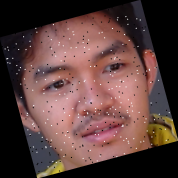

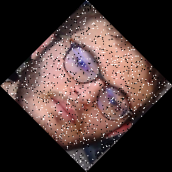


Testing images


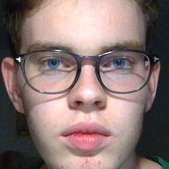

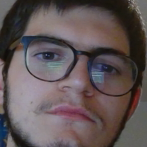


Testing test images


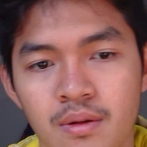

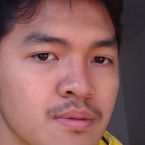

In [81]:
import IPython.display as display

print('Training images')
for n in range(2):
  image_path = random.choice(all_image_paths_train)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

print('\nTesting images')
for n in range(2):
  image_path = random.choice(all_image_paths_test)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))
  
print('\nTesting test images')
for n in range(2):
  image_path = random.choice(all_image_paths_testing_test)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

###Label images

In [82]:
label_names_0 = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names_1 = sorted(item.name for item in data_root_1.glob('*/') if item.is_dir())
label_names_2 = sorted(item.name for item in data_root_2.glob('*/') if item.is_dir())

label_names = label_names_0 + label_names_1 + label_names_2
label_names

['Guillaume_Loranchet',
 'Guillaume_Paya',
 'Konstantinos_A',
 'Miha_Sma',
 'Nicholas_S']

In [83]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'Guillaume_Loranchet': 0,
 'Guillaume_Paya': 1,
 'Konstantinos_A': 2,
 'Miha_Sma': 3,
 'Nicholas_S': 4}

In [0]:
for name in label_names:
  stri = '/root/.keras/datasets/next_ite/' + name + '/.DS_Store'
  if stri in all_image_paths_test:
    all_image_paths_test.remove(stri)
  stri = '/root/.keras/datasets/next_ite/' + name + '/._.DS_Store'
  if stri in all_image_paths_test:
    all_image_paths_test.remove(stri)

In [0]:
#for path in all_image_paths_test:
#  print(path)

In [86]:
all_image_labels_train = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_train]

print("First 10 labels indices of training set: ", all_image_labels_train[:10])

all_image_labels_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_test]

print("First 10 labels indices of training set: ", all_image_labels_test[:10])

all_image_labels_testing_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_testing_test]

print("First 10 labels indices of training set: ", all_image_labels_testing_test[:10])

First 10 labels indices of training set:  [3, 3, 2, 4, 2, 2, 1, 4, 3, 2]
First 10 labels indices of training set:  [2, 2, 4, 0, 1, 2, 1, 0, 2, 3]
First 10 labels indices of training set:  [2, 0, 3, 3, 1, 2, 4, 3, 2, 2]


###Load images with Tensor Flow

In [87]:
img_path = all_image_paths_train[0]
img_path

'/root/.keras/datasets/new_pic(1)/Miha_Sma/Miha_Sma_28_sp_9_rot_clock_1.png'

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])

  return image

def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

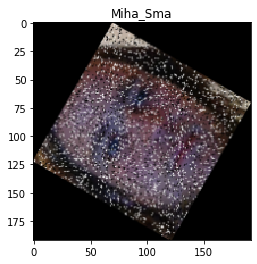

In [89]:
image_path = all_image_paths_train[0]
label = all_image_labels_train[0]

plt.imshow(load_and_preprocess_image(image_path)/255)
plt.grid(False)
#plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

In [90]:
n_train = len(all_image_paths_train)

x_train_aux = [load_and_preprocess_image(all_image_paths_train[i]) for i in range(n_train)]
x_train_aux_2 = np.array([np.array(x_train_aux[i]) for i in range(n_train)])
x_train = x_train_aux_2 / 255   #normalize between 0 and 1

n_test = len(all_image_paths_test)

x_test_aux = [load_and_preprocess_image(all_image_paths_test[i]) for i in range(n_test)]
x_test_aux_2 = np.array([np.array(x_test_aux[i]) for i in range(n_test)])
x_test = x_test_aux_2 / 255   #normalize between 0 and 1

n_testing_test = len(all_image_paths_testing_test)

x_testing_test_aux = [load_and_preprocess_image(all_image_paths_testing_test[i]) for i in range(n_testing_test)]
x_testing_test_aux_2 = np.array([np.array(x_testing_test_aux[i]) for i in range(n_testing_test)])
x_testing_test = x_testing_test_aux_2 / 255   #normalize between 0 and 1
print('x_train shape = ',x_train.shape)
print('x_test shape = ',x_test.shape)
print('x_testing_test shape = ',x_testing_test.shape)

n_test_abdel = len(image_paths_test_abdel)

x_test_abdel_aux = [load_and_preprocess_image(image_paths_test_abdel[i]) for i in range(n_test_abdel)]
x_test_abdel_aux_2 = np.array([np.array(x_test_abdel_aux[i]) for i in range(n_test_abdel)])
x_test_abdel = x_test_abdel_aux_2 / 255   #normalize between 0 and 1
print('x_test_abdel shape = ',x_test_abdel.shape)

y_train = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_train])
y_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_test])
y_testing_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_testing_test])
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)
print('y_testing_test shape = ',y_testing_test.shape)

labels = label_names
print('labels: ',labels)

x_train shape =  (4230, 192, 192, 3)
x_test shape =  (334, 192, 192, 3)
x_testing_test shape =  (58, 192, 192, 3)
x_test_abdel shape =  (27, 192, 192, 3)
y_train shape =  (4230, 5)
y_test shape =  (334, 5)
y_testing_test shape =  (58, 5)
labels:  ['Guillaume_Loranchet', 'Guillaume_Paya', 'Konstantinos_A', 'Miha_Sma', 'Nicholas_S']


(4230, 5)


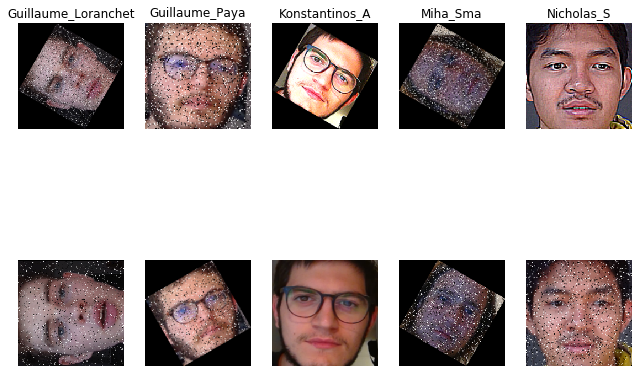

(334, 5)


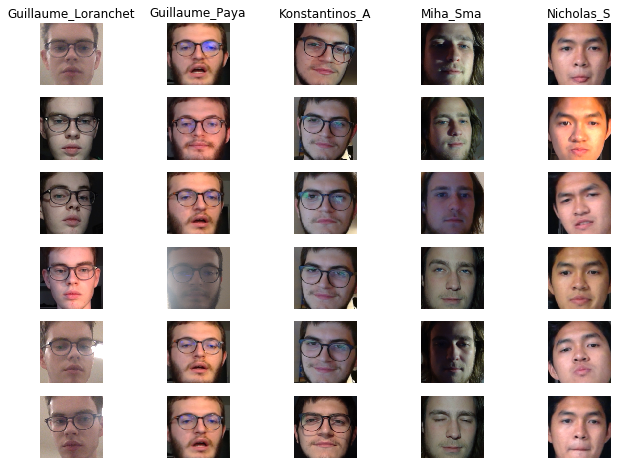

(58, 5)


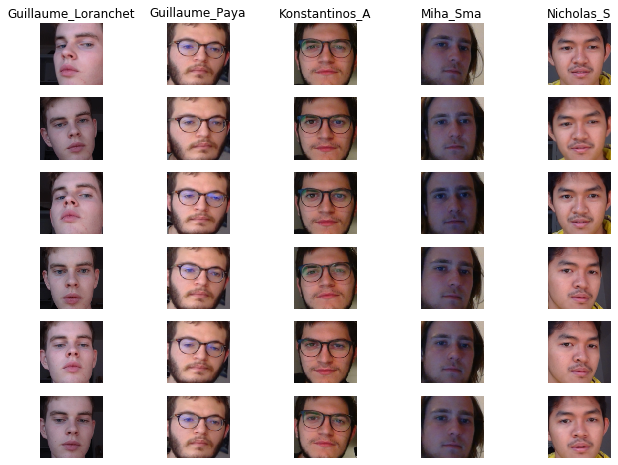

In [91]:
def show_first_n_images_in_categories(n, images, categories, labels, file_name=None):
    """Plots the first n images in each category from the image data."""
    f, axes = plt.subplots(n, len(categories[0]), figsize=(11,8))
    print(categories.shape)
    for i in range(len(categories[0])):
        count = 0
        j = 0
        while count < n and j < len(categories):
            #print(j,i)
            if categories[j][i] == 1:
                axes[count,i].imshow(images[j,:,:,:])
                axes[count,i].axis('off')
                if count == 0:
                    axes[count,i].set_title(labels[i])
                count += 1
            j += 1

    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()

show_first_n_images_in_categories(2, x_train, y_train, labels)
show_first_n_images_in_categories(6, x_test, y_test, labels)
show_first_n_images_in_categories(6, x_testing_test, y_testing_test, labels)

##kNN Model

In [25]:
def euclidean_distance(ima_1,ima_2):
  return np.sqrt(sum(sum(sum((ima_1-ima_2)**2))))

print(euclidean_distance(x_train[0],x_train[1]))

115.8746807995199


In [0]:
def test(ima_test,label):
  print(label)
  x1, x2, x3, x4 = [],[],[],[]
  for i in range(0,100):
    if y_train[i][0]:
      x1.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][1]:
      x2.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][2]:
      x3.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][3]:
      x4.append(euclidean_distance(ima_test,x_train[i]))

  liste = [np.mean(x1),np.mean(x2),np.mean(x3),np.mean(x4)]
  return liste

#test(x_test[32],y_test[32])

In [0]:
def average(liste):
  return sum(liste)/len(liste)

In [0]:
def clustering(x,y,k):
  nb_pers = len(y[0])  #4
  res = [[] for _ in range(nb_pers)]
  intermediate = [[] for _ in range(nb_pers)]
  
  for i in range(len(x)):
    for j in range(nb_pers):
      if len(intermediate[j]) == k:   #make groups of size k
        res[j].append(average(intermediate[j]))  
        intermediate[j] = []
    for j in range(nb_pers):
      if y[i][j]:   # i-th picture represent the j-th person in labels
        intermediate[j].append(x[i])
  for j in range(nb_pers):
    if len(intermediate[j]) != 0:
      res[j].append(average(intermediate[j])) 
  return res
        

A = clustering(x_train,y_train,100)

In [29]:
def try_mode(liste):
  '''check if there are more than 1 mode'''
  try:
    return mode(liste)
  except StatisticsError:
    return -1
  
B = [1,2,3]
try_mode(B)

-1

In [0]:
A = clustering(x_test,y_test,2)

def kNN(ima_input,A,k):  
  res_aux = {}
  for i in range(len(A)):
    for j in range(len(A[i])):
      res_aux[euclidean_distance(ima_input,A[i][j])] = i
        
  res = [value for (key,value) in sorted(res_aux.items())]   #take only the first k closest element
  #print(res)
  while try_mode(res[:k]) == -1:  #return the most frequent element
    k += 1
  return mode(res[:k])
  
  
def test_knn(x_test,y_test,A,k):
  '''output: accuracy'''
  res = 0
  for i in range(len(y_test)):
    val = kNN(x_test[i],A,k)
    if y_test[i][val]:
      res += 1
  return res/len(y_test)  

#print(test_knn(x_testing_test,y_testing_test,A,4))


#for k in range(1,10,1):
#  print("Taking into account the {} closest neighbourd, the accuracy is {}".format(k,test_knn(x_testing_test,y_testing_test,A,k)))
#  print('')


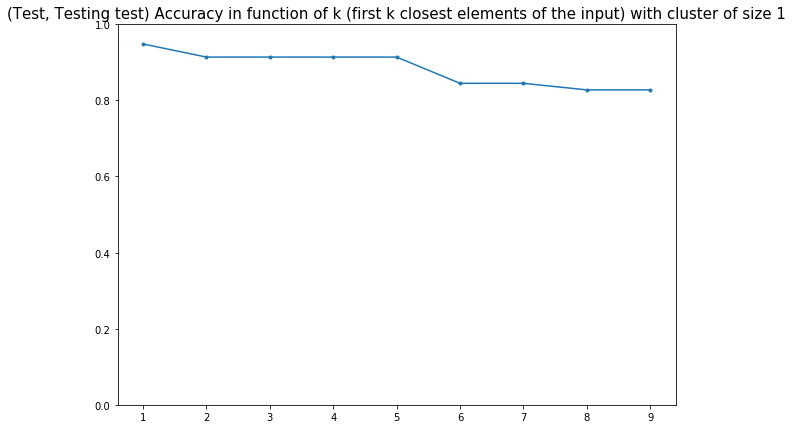

"\nA = [0.4576271186440678, 0.632768361581921,0.632768361581921 ,0.6440677966101694 , 0.6610169491525424, 0.6497175141242938, 0.6384180790960452,0.6101694915254238 , 0.5932203389830508]\nC = [i for i in range(1,10)]\n\nplt.figure(figsize=(10,7))\nplt.plot(C,A,marker='.')\nplt.title('(Train, Test) Accuracy in function of k (first k closest elements of the input)',fontsize=15)\nplt.ylim([0,1])\nplt.show()\n\nA = [0.6384180790960452, 0.6610169491525424, 0.6610169491525424, 0.6892655367231638, 0.7062146892655368, 0.7005649717514124, 0.6949152542372882, 0.655367231638418, 0.6384180790960452]\nC = [i for i in range(1,10)]\n\nplt.figure(figsize=(10,7))\nplt.plot(C,A,marker='.')\nplt.title('(Train, Test) Accuracy in function of k (first k closest elements of the input)',fontsize=15)\nplt.ylim([0,1])\nplt.show()\n"

In [31]:
A = [0.9482758620689655, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.8448275862068966, 0.8448275862068966, 0.8275862068965517, 0.8275862068965517]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('(Test, Testing test) Accuracy in function of k (first k closest elements of the input) with cluster of size 1',fontsize=15)
plt.ylim([0,1])
plt.show()


'''
A = [0.4576271186440678, 0.632768361581921,0.632768361581921 ,0.6440677966101694 , 0.6610169491525424, 0.6497175141242938, 0.6384180790960452,0.6101694915254238 , 0.5932203389830508]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('(Train, Test) Accuracy in function of k (first k closest elements of the input)',fontsize=15)
plt.ylim([0,1])
plt.show()

A = [0.6384180790960452, 0.6610169491525424, 0.6610169491525424, 0.6892655367231638, 0.7062146892655368, 0.7005649717514124, 0.6949152542372882, 0.655367231638418, 0.6384180790960452]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('(Train, Test) Accuracy in function of k (first k closest elements of the input)',fontsize=15)
plt.ylim([0,1])
plt.show()
'''

In [0]:
n = len(y_testing_test)

def test_plot(liste = [1,2,3,4,5,6,7,8,10,12,15]):
  for i in liste:
    A = clustering(x_test,y_test,i)
    def test_time():
      print('Cluster of {} elements'.format(i))
      print('Accuracy: ',test_knn(x_testing_test,y_testing_test,A,3))

    print('Time to predict each picture',timeit.timeit(test_time,number=1)/n,'\n')
    
#test_plot()

def test_plot_v2(x_train,y_train,x_test,y_test,liste,k):
  res = [0 for _ in range(len(liste))]
  j = 0
  for i in liste:
    A = clustering(x_train,y_train,i)
    accuracy = test_knn(x_test,y_test,A,k)
    res[j] = accuracy
    j += 1
  return res

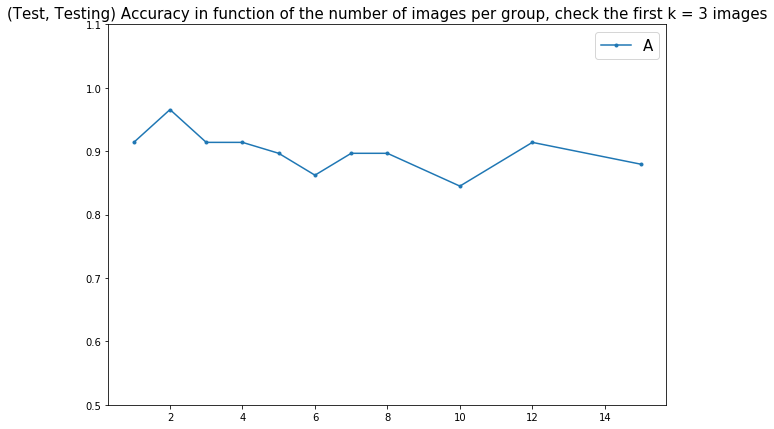

"\nA = [1.9556941677344652,0.9695916148757019,0.6562474537514149,0.48557390805649575,0.3847716027118679,0.32295399453672524,0.27883983207344387,0.24320527823164087, 0.1919944706892675 ,0.16246278505084485  , 0.12778141203954752 ]\nB = [0.4519774011299435,0.5988700564971752,0.6779661016949152,0.6610169491525424,0.6045197740112994,0.5536723163841808 ,0.519774011299435,0.5310734463276836 ,0.6666666666666666 ,0.5141242937853108 , 0.5875706214689266]\nC = [i for i in range(1,9)]+[10,12,15]\n\nplt.figure(figsize=(10,7))\nplt.plot(C,A,marker='.')\nplt.plot(C,B,marker='.')\nplt.title('(Train, Test) Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)\nplt.legend(('time per image','Accuracy'),loc='best',fontsize=15)\nplt.ylim([0,1.5])\nplt.show()\n\nA = [1.5631840424519776,0.7896613351468931 ,0.7388307934406788 , 0.3963731183954804 ,0.4456509903672313 ,0.26446220867796655 ,0.3217400533559327 ,0.1989596205762

In [33]:
B = [0.9137931034482759,0.9655172413793104,0.9137931034482759,0.9137931034482759,0.896551724137931,0.8620689655172413,0.896551724137931,0.896551724137931,0.8448275862068966,0.9137931034482759,0.8793103448275862]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,B,marker='.')
plt.title('(Test, Testing) Accuracy in function of the number of images per group, check the first k = 3 images',fontsize=15)
plt.legend('Accuracy',loc='best',fontsize=15)
plt.ylim([0.5,1.1])
plt.show()


'''
A = [1.9556941677344652,0.9695916148757019,0.6562474537514149,0.48557390805649575,0.3847716027118679,0.32295399453672524,0.27883983207344387,0.24320527823164087, 0.1919944706892675 ,0.16246278505084485  , 0.12778141203954752 ]
B = [0.4519774011299435,0.5988700564971752,0.6779661016949152,0.6610169491525424,0.6045197740112994,0.5536723163841808 ,0.519774011299435,0.5310734463276836 ,0.6666666666666666 ,0.5141242937853108 , 0.5875706214689266]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('(Train, Test) Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [1.5631840424519776,0.7896613351468931 ,0.7388307934406788 , 0.3963731183954804 ,0.4456509903672313 ,0.26446220867796655 ,0.3217400533559327 ,0.1989596205762712 ,0.2238477530395486 ,0.13305251205649724 ,0.10575665348587636 ]
B = [0.4519774011299435,0.5875706214689266,0.5649717514124294,0.576271186440678,0.4519774011299435,0.4745762711864407,0.2994350282485876,0.5028248587570622,0.3220338983050847,0.3898305084745763,0.4463276836158192]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('(Train, Test) Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [5.509470149999999,0.9767672461638421 ,1.3214222332033896 ,0.4847251269265539 ,0.43708202742372726 ,0.32536828557627134 ,0.3646449667118636 ,0.2441796150169492 ,0.1939253001242925 ,0.1643949571977422 ,0.18692199483615757 ]
B = [0.4519774011299435,0.5649717514124294,0.5480225988700564,0.6949152542372882,0.632768361581921,0.6440677966101694,0.6214689265536724,0.5706214689265536,0.6610169491525424,0.480225988700565,0.6214689265536724]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('(Train, Test) Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [1.9345539544124293,0.9893024473559323,1.2290385608757062,0.4926231926723159 ,0.7401058078813552,0.326265965728814,0.49248329315819217,0.24658806461581925,0.30851309332768395,0.16557568342372855,0.17173665325988668]
B = [0.4519774011299435,0.5649717514124294,0.5480225988700564,0.6271186440677966,0.6610169491525424,0.5536723163841808,0.615819209039548,0.5988700564971752,0.5819209039548022,0.480225988700565,0.559322033898305]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('(Train, Test) Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 2 images with the same set as above',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()
'''

In [0]:
lis1 = []

def double_test():
  lis1 = []
  for i in range(1,10):
    #print("Clusters of size ",i)
    lis2 = []
    A = clustering(x_test,y_test,i)   #train on the test set
    for k in range(1,10):
      #print("Taking into account the {} closest neighbourd, the accuracy is {}".format(k,test_knn(x_testing_test,y_testing_test,A,k)))   #test on the testing test set
      #print('')
      lis2.append(test_knn(x_testing_test,y_testing_test,A,k))
    lis1.append(lis2)

#lis1 = double_test()
lis1 = np.array(lis1).T.tolist()
for i in lis1:
  print(i)

In [35]:
lis1_1 = np.array([[0.9482758620689655, 0.896551724137931, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9482758620689655, 0.9310344827586207],[0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9482758620689655, 0.9310344827586207, 0.9482758620689655, 0.9482758620689655],[0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9482758620689655, 0.9310344827586207, 0.9482758620689655, 0.9482758620689655],[0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9310344827586207, 0.9482758620689655, 0.8793103448275862],[0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.8793103448275862],[0.8448275862068966, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.896551724137931, 0.896551724137931, 0.8620689655172413],[0.8448275862068966, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.8793103448275862, 0.896551724137931, 0.8793103448275862],[0.8275862068965517, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.896551724137931, 0.8793103448275862, 0.8793103448275862, 0.8275862068965517],[0.8275862068965517, 0.9137931034482759, 0.896551724137931, 0.8620689655172413, 0.896551724137931, 0.896551724137931, 0.8793103448275862, 0.8448275862068966, 0.7758620689655172]])
lis1_2 = np.array([[0.9482758620689655, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.8448275862068966, 0.8448275862068966, 0.8275862068965517, 0.8275862068965517], [0.9482758620689655, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.896551724137931, 0.896551724137931], [0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.896551724137931, 0.8793103448275862, 0.896551724137931, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759], [0.9310344827586207, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9482758620689655, 0.9310344827586207, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759], [0.9137931034482759, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.8793103448275862, 0.8793103448275862, 0.896551724137931], [0.9310344827586207, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.9137931034482759, 0.9137931034482759, 0.8793103448275862, 0.8793103448275862, 0.8793103448275862], [0.9310344827586207, 0.8620689655172413, 0.8620689655172413, 0.896551724137931, 0.896551724137931, 0.8620689655172413, 0.8620689655172413, 0.8620689655172413, 0.8620689655172413], [0.9827586206896551, 0.9137931034482759, 0.9137931034482759, 0.896551724137931, 0.896551724137931, 0.8620689655172413, 0.8275862068965517, 0.7931034482758621, 0.7586206896551724], [0.896551724137931, 0.896551724137931, 0.896551724137931, 0.8103448275862069, 0.8103448275862069, 0.8103448275862069, 0.8275862068965517, 0.7931034482758621, 0.7758620689655172]])
lis1_3 = np.array([[0.9482758620689655, 0.9137931034482759, 0.9482758620689655, 0.896551724137931, 0.8793103448275862, 0.896551724137931, 0.896551724137931, 0.9137931034482759, 0.8793103448275862], [0.9137931034482759, 0.9482758620689655, 0.9482758620689655, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759], [0.9137931034482759, 0.9482758620689655, 0.9482758620689655, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759], [0.9137931034482759, 0.9482758620689655, 0.9482758620689655, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759], [0.9137931034482759, 0.9310344827586207, 0.9482758620689655, 0.896551724137931, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759], [0.8448275862068966, 0.9482758620689655, 0.9482758620689655, 0.896551724137931, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759], [0.8448275862068966, 0.9482758620689655, 0.9482758620689655, 0.896551724137931, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759], [0.8275862068965517, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.8448275862068966, 0.8620689655172413], [0.8275862068965517, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.9310344827586207, 0.9137931034482759, 0.9137931034482759, 0.8448275862068966, 0.7758620689655172]])


lis = ((lis1_1 + lis1_2 + lis1_3)/3).tolist()

resul = {'k = ' + str(i):lis[i-1] for i in range(1,len(lis)+1)}
df = pd.DataFrame.from_dict(resul)
df.transpose()
df.index = np.arange(1,len(df)+1)
df

,k = 1,k = 2,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8,k = 9
1,0.948276,0.925287,0.913793,0.919540,0.913793,0.873563,0.873563,0.879310,0.850575
2,0.908046,0.936782,0.931034,0.942529,0.925287,0.919540,0.908046,0.919540,0.913793
3,0.925287,0.931034,0.925287,0.942529,0.931034,0.919540,0.908046,0.913793,0.902299
4,0.908046,0.919540,0.908046,0.931034,0.913793,0.902299,0.902299,0.908046,0.862069
5,0.908046,0.919540,0.902299,0.925287,0.919540,0.913793,0.908046,0.913793,0.879310
6,0.890805,0.931034,0.925287,0.931034,0.925287,0.919540,0.902299,0.890805,0.873563
7,0.890805,0.919540,0.919540,0.925287,0.908046,0.896552,0.885057,0.873563,0.873563
8,0.896552,0.925287,0.931034,0.931034,0.913793,0.896552,0.890805,0.839080,0.827586
9,0.879310,0.919540,0.925287,0.902299,0.896552,0.885057,0.885057,0.816092,0.775862


In [0]:
def test_average_accuracy(k):
  random.shuffle(all_image_paths_testing_test)

  random.shuffle(all_image_paths_test)
  
  all_image_labels_testing_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_testing_test]

  all_image_labels_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_test]
  
  n_testing_test = len(all_image_paths_testing_test)

  x_testing_test_aux = [load_and_preprocess_image(all_image_paths_testing_test[i]) for i in range(n_testing_test)]
  x_testing_test_aux_2 = np.array([np.array(x_testing_test_aux[i]) for i in range(n_testing_test)])
  x_testing_test = x_testing_test_aux_2 / 255   #normalize between 0 and 1

  n_test = len(all_image_paths_test)

  x_test_aux = [load_and_preprocess_image(all_image_paths_test[i]) for i in range(n_test)]
  x_test_aux_2 = np.array([np.array(x_test_aux[i]) for i in range(n_test)])
  x_test = x_test_aux_2 / 255   #normalize between 0 and 1

  y_testing_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_testing_test])
  y_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_test])

  accuracy = test_plot_v2(x_test,y_test,x_testing_test,y_testing_test,[1,2,3],k)
  
  print(accuracy)
  
  return accuracy

n = 1
k = 3
accu= [] 

#for _ in range(n):
  #accu.append(test_average_accuracy(k))
  
#print(accu)

In [37]:
print(np.mean([i[0] for i in accu]))
print("Average accuracy for clusters of size 1 with k = 3: ", 0.913793103448276)
print("Average accuracy for clusters of size 2 with k = 3: ", 0.9224137931034482)
print("Average accuracy for clusters of size 3 with k = 3: ", 0.9275862068965516)


nan
Average accuracy for clusters of size 1 with k = 3:  0.913793103448276
Average accuracy for clusters of size 2 with k = 3:  0.9224137931034482
Average accuracy for clusters of size 3 with k = 3:  0.9275862068965516


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [38]:
#test with abdel who's not in the training set

print(x_test_abdel.shape)

A = clustering(x_train,y_train,1)
B = clustering(x_test,y_test,1)


def test_abdel(x_test_abdel,A,k=1):
  '''output: accuracy'''
  res = []
  for i in range(len(x_test_abdel)):
    val = kNN(x_test_abdel[i],A,k)
    res.append(val)
  return res

# res = test_abdel(x_test_abdel,A,)
# print(res)

# for i in range(len(labels)):
#   print('{} appears {} times'.format(labels[i],res.count(i)))
# print('')

# res = test_abdel(x_test_abdel,B)
# print(res)

# for i in range(len(labels)):
#   print('{} appears {} times'.format(labels[i],res.count(i)))

(27, 192, 192, 3)


In [39]:
print(x_testing_test.shape)

A = clustering(x_train,y_train,1)
B = clustering(x_test,y_test,1)

print(len(y_testing_test))

def test_random(x_testing_test,A,k=1):
  '''output: accuracy'''
  res = []
  for i in range(len(x_testing_test)):
    val = kNN(x_testing_test[i],A,k)
    res.append(val)
  return res


res = test_random(x_testing_test,B)
print(res)

temp = [list(i).index(1) for i in y_testing_test]

for i in range(len(labels)):
  print('{} appears {} times in the test list and {} times in the predictions'.format(labels[i],temp.count(i),res.count(i)))
  

(58, 192, 192, 3)
58
[1, 1, 3, 4, 1, 3, 4, 2, 0, 4, 1, 2, 0, 2, 4, 1, 2, 2, 3, 1, 0, 4, 2, 3, 3, 3, 2, 4, 3, 0, 1, 3, 4, 3, 3, 3, 0, 2, 0, 0, 2, 2, 1, 1, 4, 2, 2, 2, 1, 1, 2, 3, 2, 4, 1, 2, 3, 4]
Guillaume_Loranchet appears 10 times in the test list and 7 times in the predictions
Guillaume_Paya appears 10 times in the test list and 12 times in the predictions
Konstantinos_A appears 16 times in the test list and 16 times in the predictions
Miha_Sma appears 12 times in the test list and 13 times in the predictions
Nicholas_S appears 10 times in the test list and 10 times in the predictions


(58, 192, 192, 3)
['Guillaume_Loranchet', 'Guillaume_Paya', 'Konstantinos_A', 'Miha_Sma', 'Nicholas_S']


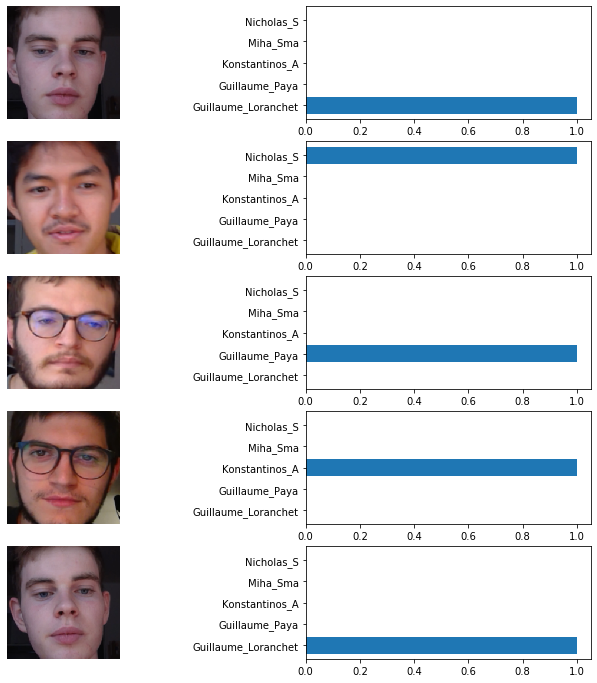

In [42]:
B = clustering(x_test,y_test,1)

def predict(x, labels, file_name=None):
    res = test_random(x,B)
    n = len(labels)
    y = np.array([[0]*i + [1] + [0]*(n-i-1) for i in res])

    f, ax = plt.subplots(x.shape[0], 2, figsize=(12,12))
    plt.subplots_adjust(wspace=0.35)
    y_pos = np.arange(len(labels))

    for i in range(x.shape[0]):
        ax[i,0].imshow(x[i,:,:,:])
        ax[i,0].axis('off')
        # print(y[i,:])
        ax[i,1].barh(y_pos, y[i,:])
        ax[i,1].set_yticks(y_pos)
        ax[i,1].set_yticklabels(labels)
    plt.show()
  
        
import random
i = random.randint(1,45)
print(x_testing_test.shape)
# print(len(x_testing_test[0]))
print(labels)
predict(x_testing_test[i:i+5,:,:,:], labels)